# A5
Credit by Yutian Lei & Ziyi Xie

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from google.colab import files

#Data preparation#

In [ ]:
# download the data
import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
        f.write(r.content)
    
save_file('https://homes.cs.washington.edu/~vinitra/cse416/a5/edx_train.csv', 'edx_train.csv')
save_file('https://homes.cs.washington.edu/~vinitra/cse416/a5/edx_test.csv', 'edx_test.csv')

In [ ]:
# load the data
edx_train = pd.read_csv('edx_train.csv')  # csv file with features and lables
edx_test = pd.read_csv('edx_test.csv')    # csv file with only features

In [ ]:
edx_train = pd.get_dummies(edx_train, columns=['course_id', 'final_cc_cname_DI', 'LoE_DI', 'gender'])
edx_test = pd.get_dummies(edx_test, columns=['course_id', 'final_cc_cname_DI', 'LoE_DI', 'gender'])
edx_train

,userid_DI,registered,viewed,explored,certified,YoB,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,course_id_HarvardX/CB22x/2013_Spring,course_id_HarvardX/CS50x/2012,course_id_HarvardX/ER22x/2013_Spring,course_id_HarvardX/PH207x/2012_Fall,course_id_HarvardX/PH278x/2013_Spring,final_cc_cname_DI_Australia,final_cc_cname_DI_Bangladesh,final_cc_cname_DI_Brazil,final_cc_cname_DI_Canada,final_cc_cname_DI_China,final_cc_cname_DI_Colombia,final_cc_cname_DI_Egypt,final_cc_cname_DI_France,final_cc_cname_DI_Germany,final_cc_cname_DI_Greece,final_cc_cname_DI_India,final_cc_cname_DI_Indonesia,final_cc_cname_DI_Japan,final_cc_cname_DI_Mexico,final_cc_cname_DI_Morocco,final_cc_cname_DI_Nigeria,final_cc_cname_DI_Other Africa,final_cc_cname_DI_Other East Asia,final_cc_cname_DI_Other Europe,final_cc_cname_DI_Other Middle East/Central Asia,"final_cc_cname_DI_Other North & Central Amer., Caribbean",final_cc_cname_DI_Other Oceania,final_cc_cname_DI_Other South America,final_cc_cname_DI_Other South Asia,final_cc_cname_DI_Pakistan,final_cc_cname_DI_Philippines,final_cc_cname_DI_Poland,final_cc_cname_DI_Portugal,final_cc_cname_DI_Russian Federation,final_cc_cname_DI_Spain,final_cc_cname_DI_Ukraine,final_cc_cname_DI_United Kingdom,final_cc_cname_DI_United States,final_cc_cname_DI_Unknown/Other,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,LoE_DI_unk,gender_f,gender_m,gender_unk
0,MHxPC130288921,1,0,0,0,1988.0,8/30/12,unk,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,MHxPC130043703,1,1,1,1,1970.0,9/4/12,1/16/13,2550.0,21.0,10.0,14.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,MHxPC130082773,1,1,0,0,1983.0,2/12/13,2/12/13,10.0,1.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,MHxPC130186614,1,1,1,1,1984.0,10/16/12,1/15/13,6015.0,50.0,616.0,15.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,MHxPC130113075,1,1,0,0,1997.0,4/11/13,4/12/13,6.0,2.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,MHxPC130051294,1,1,0,0,1990.0,10/25/12,3/19/13,3.0,1.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
8754,MHxPC130345596,1,1,0,0,1991.0,8/25/13,8/25/13,8.0,1.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
8755,MHxPC130492275,1,0,0,0,1986.0,3/21/13,3/21/13,2.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8756,MHxPC130249788,1,0,0,0,1974.0,5/11/13,5/11/13,4.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [ ]:
# features and target
features = edx_train.columns.to_list()
features.remove('userid_DI')
features.remove('certified')
features.remove('start_time_DI')
features.remove('last_event_DI')
target = 'certified'
features

['registered',
 'viewed',
 'explored',
 'YoB',
 'nevents',
 'ndays_act',
 'nplay_video',
 'nchapters',
 'nforum_posts',
 'course_id_HarvardX/CB22x/2013_Spring',
 'course_id_HarvardX/CS50x/2012',
 'course_id_HarvardX/ER22x/2013_Spring',
 'course_id_HarvardX/PH207x/2012_Fall',
 'course_id_HarvardX/PH278x/2013_Spring',
 'final_cc_cname_DI_Australia',
 'final_cc_cname_DI_Bangladesh',
 'final_cc_cname_DI_Brazil',
 'final_cc_cname_DI_Canada',
 'final_cc_cname_DI_China',
 'final_cc_cname_DI_Colombia',
 'final_cc_cname_DI_Egypt',
 'final_cc_cname_DI_France',
 'final_cc_cname_DI_Germany',
 'final_cc_cname_DI_Greece',
 'final_cc_cname_DI_India',
 'final_cc_cname_DI_Indonesia',
 'final_cc_cname_DI_Japan',
 'final_cc_cname_DI_Mexico',
 'final_cc_cname_DI_Morocco',
 'final_cc_cname_DI_Nigeria',
 'final_cc_cname_DI_Other Africa',
 'final_cc_cname_DI_Other East Asia',
 'final_cc_cname_DI_Other Europe',
 'final_cc_cname_DI_Other Middle East/Central Asia',
 'final_cc_cname_DI_Other North & Central Amer

In [ ]:
# data split
train_data, test_data = train_test_split(edx_train, test_size = 0.1, random_state = 1)

#DecisionTreeClassifier#

In [144]:
# find the best hyperparameters for DecisionTree
tree = DecisionTreeClassifier()
hyperparameters = {'min_samples_leaf': [1, 10, 11, 12, 13, 15], 'max_depth': range(1, 10)}
search = GridSearchCV(tree, hyperparameters, cv=6, return_train_score=True)
search.fit(train_data[features], train_data[target])
search.best_params_

KeyboardInterrupt: ignored

In [145]:
# train DecisionTreeClassifier model
decision_tree_model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=12)
decision_tree_model.fit(train_data[features], train_data[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [146]:
# accuracy for DecisionTreeClassifier
dtm_pred = decision_tree_model.predict(test_data[features])
accuracy_score(test_data[target], dtm_pred)

0.978310502283105

In [ ]:
# feature that has the highest weight for DecisionTree model
features[np.argmax(decision_tree_model.feature_importances_)]

'nchapters'

#RandomForestClassifier#

In [94]:
# find the best hyperparameters for RandomForest, this one will run for 
# a long time, so commented it out for time-saving
tree2 = RandomForestClassifier()
hyperparameters = {'n_estimators': [100, 500, 1000, 1200], 'max_depth': range(14, 20), 'min_samples_leaf': [1, 5, 10, 15, 20]}
search = GridSearchCV(tree2, hyperparameters, cv=6, return_train_score=True)
search.fit(train_data[features], train_data[target])
search.best_params_

{'max_depth': 18, 'min_samples_leaf': 1, 'n_estimators': 1000}

In [147]:
randomForest_model = RandomForestClassifier(max_depth=18, min_samples_leaf=1, n_estimators=1000)
randomForest_model.fit(train_data[features], train_data[target])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
# accuracy for RandomForestClassifier
rfm_pred = randomForest_model.predict(test_data[features])
accuracy_score(test_data[target], rfm_pred)

0.978310502283105

In [70]:
# feature that has the highest weight for RandomForestClassifier
features[np.argmax(randomForest_model.feature_importances_)]

'nchapters'

#AdaBoostClassifier#

In [167]:
#best base estimator for AdaBoost
ada_base = DecisionTreeClassifier(max_depth=12, min_samples_leaf=15)

In [114]:
# find the best hyperparameters for AdaBoost, this one will run for 
# a long time, so commented it out for time-saving
test_base = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
test_base2 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=12)
hyperparameters_ada = {'base_estimator' : [test_base, ada_base, test_base2],'n_estimators': [800, 1000, 1200, 1400]}
ada_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyperparameters_ada,cv=6,return_train_score=True)
ada_search.fit(train_data[features], train_data[target])
print(ada_search.best_params_)
print(ada_search.best_score_)

KeyboardInterrupt: ignored

In [174]:
# train AdaBoostClassifier model
ada_model = AdaBoostClassifier(base_estimator=ada_base, n_estimators=1200, random_state=0)
ada_model.fit(train_data[features], train_data[target])
ada_pred = ada_model.predict(test_data[features])
accuracy_score(test_data[target], ada_pred)

0.980593607305936

In [175]:
# feature that has the highest weight for AdaBoostClassifier
important_features_value = ada_model.feature_importances_
important_features_value = np.where(np.isnan(important_features_value), 0, important_features_value) 
top_5_idx = np.argsort(important_features_value)[-5:]
important_features = [features[i] for i in top_5_idx]
important_features

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:578: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


['final_cc_cname_DI_United States', 'nchapters', 'YoB', 'ndays_act', 'nevents']

In [170]:
# display feature scores
important_features_value

array([0.00000000e+00, 1.07024371e-11, 6.64014152e-03, 1.47427716e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.20766520e-01,
       3.02610138e-03, 2.22341479e-03, 2.54532628e-03, 1.18534356e-02,
       2.22810752e-03, 4.11283211e-03, 4.90576461e-03, 1.77383851e-06,
       5.47964922e-03, 8.98507703e-03, 2.13401524e-04, 3.57765361e-04,
       4.76806202e-03, 1.00401550e-04, 1.16722951e-02, 1.36458529e-03,
       2.45251128e-02, 6.07413473e-05, 6.60237916e-05, 1.17653022e-03,
       0.00000000e+00, 2.37739075e-03, 8.51180579e-03, 9.93494960e-04,
       9.41878018e-03, 1.23669662e-02, 2.08868887e-03, 0.00000000e+00,
       1.38820326e-03, 6.97294525e-03, 1.03553121e-03, 1.76853629e-03,
       4.42533882e-03, 9.03076910e-04, 3.90604694e-03, 1.30738566e-03,
       4.14711254e-05, 1.49747284e-02, 2.83187016e-02, 2.69136784e-03,
       1.89882439e-02, 4.46228731e-03, 3.07493467e-03, 1.82896423e-02,
       2.10302930e-02, 4.21624773e-03, 1.78036925e-02, 1.64270520e-02,
      

#ROC curve

In [176]:
# Calculate False Positive Rate and True Positive Rate for each model predictions
dtm_pred_prob = decision_tree_model.predict_proba(test_data[features])[:, 1]
fpr_dtm, tpr_dtm, _ = roc_curve(test_data[target], dtm_pred_prob)
rfm_pred_prob = randomForest_model.predict_proba(test_data[features])[:, 1]
fpr_rfm, tpr_rfm, _ = roc_curve(test_data[target], rfm_pred_prob)
ada_pred_prob = ada_model.predict_proba(test_data[features])[:, 1]
fpr_ada, tpr_ada, _ = roc_curve(test_data[target], ada_pred_prob)

Plotting: https://colab.research.google.com/drive/1FZ99gMJILUvnKHL0ViFq4SmBhHyWaGdJ?usp=sharing

Text(0, 0.5, 'True positive rate')

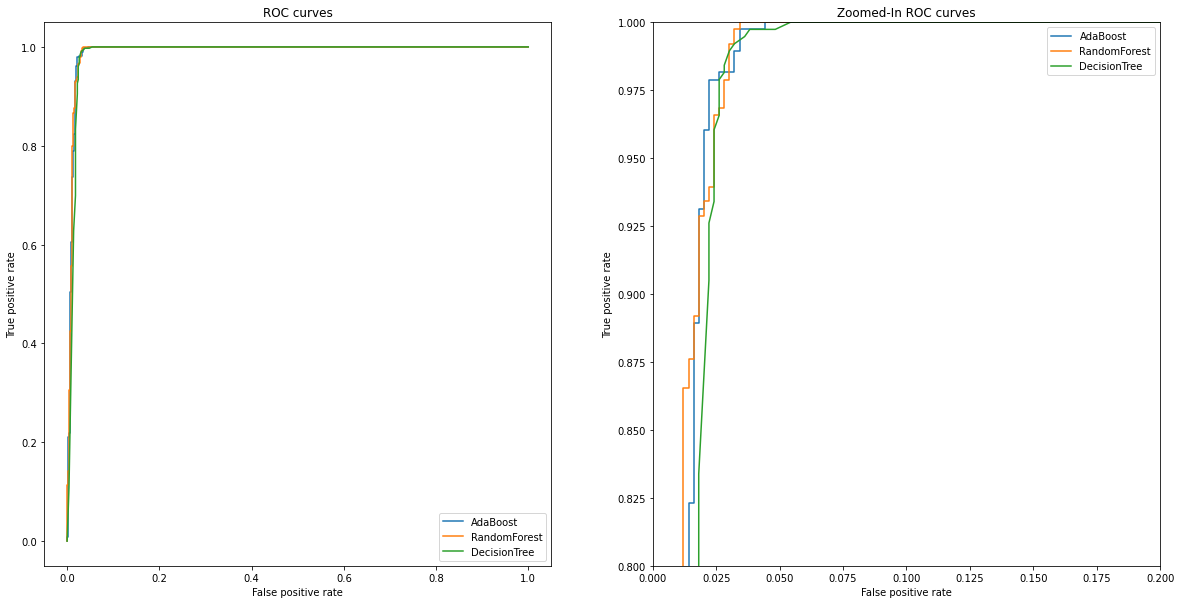

In [177]:
# Plot ROC for each model, plot one zoom-in version of ROC
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(fpr_rfm, tpr_rfm, label='RandomForest')
ax[0].plot(fpr_ada, tpr_ada, label='AdaBoost')
ax[0].plot(fpr_dtm, tpr_dtm, label='DecisionTree')
ax[0].legend(["AdaBoost","RandomForest","DecisionTree"])
ax[0].set_title("ROC curves")
ax[0].set(xlabel='False positive rate')
ax[0].set(ylabel='True positive rate')

plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
ax[1].plot(fpr_rfm, tpr_rfm, label='RandomForest')
ax[1].plot(fpr_ada, tpr_ada, label='AdaBoost')
ax[1].plot(fpr_dtm, tpr_dtm, label='DecisionTree')
ax[1].legend(["AdaBoost","RandomForest","DecisionTree"])
ax[1].set_title("Zoomed-In ROC curves")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [ ]:
# download graph
filename="TestImage.png"
fig.savefig(filename)
files.download(filename)

#Predict test data#

In [178]:
final_pred_dt = decision_tree_model.predict(edx_test[features])
final_pred = ada_model.predict(edx_test[features])
final_pred_rfm = randomForest_model.predict(edx_test[features])
df = pd.DataFrame({'userid_DI':edx_test['userid_DI'], 'certified':final_pred})
df2 = pd.DataFrame({'userid_DI':edx_test['userid_DI'], 'certified':final_pred_rfm})
df3 = pd.DataFrame({'userid_DI':edx_test['userid_DI'], 'certified':final_pred_dt})
df

,userid_DI,certified
0,MHxPC130544772,0
1,MHxPC130524262,1
2,MHxPC130039229,0
3,MHxPC130287187,0
4,MHxPC130483651,0
...,...,...
2915,MHxPC130424830,1
2916,MHxPC130330709,0
2917,MHxPC130271947,0
2918,MHxPC130565465,0


In [162]:
# download adaboost results
df.to_csv('sumbission.csv', index=False)
files.download('sumbission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
# download randomforest results
df2.to_csv('sumbission_rfm.csv', index=False)
files.download('sumbission_rfm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download decision tree results
df3.to_csv('sumbission_dt.csv', index=False)
files.download('sumbission_dt.csv')